# Example notebook showcasing investigation of a small outbreak of Vancomycin Resistant Enterococcus (VRE) in patient samples

Data has previously gone through QC and anlysis via the CZID pipeline https://chanzuckerberg.zendesk.com/hc/en-us/articles/360050326971-Guide-Data-Analysis 

## Preliminary steps & getting files ready for analysis

In [18]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### This is where the directory is mounted at (/data)

In [2]:
pwd

'/data/RR141'

In [1]:
cd example_spid_notebook/

/data/RR141/example_spid_notebook


In [3]:
ls

S1_126562_reads_nh_Enterococc.fasta*  S4_126565_reads_nh_Enterococc.fasta*
S2_126563_reads_nh_Enterococc.fasta*  S5_126566_reads_nh_Enterococc.fasta*
S3_126564_reads_nh_Enterococc.fasta*


In [5]:
!head S1_126562_reads_nh_Enterococc.fasta 

>family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:AB038464.1:M05295:525:000000000-JVN69:1:2108:27360:19769/1
CCTAAATTAATGTTTTTAGACTATTATTCTAACATTCATTAATTTAGGGGTGATTAGATTATGAAACATTTAAAAATTTTG
>family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:AB038464.1:M05295:525:000000000-JVN69:1:2108:27360:19769/2
CAAAATTTTTAAATGTTTCATAATCTAATCACCCCTAAATTAATGAATGTTAGAATAATAGTCTAAAAACATTAATTTAGG
>family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:AB038464.1:M05295:525:000000000-JVN69:1:2113:16994:25885/1
TCATTAAATTTCAAAAAACAATTCCTTCTTAAAAGTGATTAAATTCTTATTCAGGAATTATTTTGCTACGTTTCAAGAAGGAATTG
>family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:AB038464.1:M05295:525:000000000-JVN69:1:2113:16994:25885/2
CAATTCCTTCTTGAAACGTAGCAAAATAATTCCTGAATAAGAATTTAATCACTTTTAAGAAGGAATTGTTTTTTGAAATTTAATGA
>family_nr:-300:family_nt:8185

In [6]:
sample_fastas = !(ls S*)
sample_fastas

['S1_126562_reads_nh_Enterococc.fasta',
 'S2_126563_reads_nh_Enterococc.fasta',
 'S3_126564_reads_nh_Enterococc.fasta',
 'S4_126565_reads_nh_Enterococc.fasta',
 'S5_126566_reads_nh_Enterococc.fasta']

In [8]:
names = []
for file in sample_fastas:
    sample_name_only = '_'.join(file.split('_')[:-4])
    names.append(sample_name_only)
names

['S1', 'S2', 'S3', 'S4', 'S5']

In [9]:
sample_names_paths = dict(zip(names, sample_fastas))
sample_names_paths

{'S1': 'S1_126562_reads_nh_Enterococc.fasta',
 'S2': 'S2_126563_reads_nh_Enterococc.fasta',
 'S3': 'S3_126564_reads_nh_Enterococc.fasta',
 'S4': 'S4_126565_reads_nh_Enterococc.fasta',
 'S5': 'S5_126566_reads_nh_Enterococc.fasta'}

### Running the first step (short_read_alignments)

In [10]:
mkdir -p short_read_alignments

In [11]:
ls -ltr

total 2629633
-rwxr-xr-x 1 5130 5000 535366568 Nov 22 22:23 S1_126562_reads_nh_Enterococc.fasta*
-rwxr-xr-x 1 5130 5000 540081199 Nov 22 22:23 S2_126563_reads_nh_Enterococc.fasta*
-rwxr-xr-x 1 5130 5000 550944683 Nov 22 22:23 S3_126564_reads_nh_Enterococc.fasta*
-rwxr-xr-x 1 5130 5000 533651549 Nov 22 22:23 S4_126565_reads_nh_Enterococc.fasta*
-rwxr-xr-x 1 5130 5000 532564690 Nov 22 22:23 S5_126566_reads_nh_Enterococc.fasta*
drwxr-xr-x 2 root root      4096 Nov 22 23:52 short_read_alignments/


**note the reference we're using here is called LR135331.fasta** This reference is selected based on the CZID pipeline.

In [13]:
align_short_read_commands = [f"'spid.jl align_short_reads --threads 16 short_read_alignments/{names} LR135331.fasta {fasta_files}'" for names, fasta_files in sample_names_paths.items()]


In [14]:
align_short_read_commands

["'spid.jl align_short_reads --threads 16 short_read_alignments/S1 LR135331.fasta S1_126562_reads_nh_Enterococc.fasta'",
 "'spid.jl align_short_reads --threads 16 short_read_alignments/S2 LR135331.fasta S2_126563_reads_nh_Enterococc.fasta'",
 "'spid.jl align_short_reads --threads 16 short_read_alignments/S3 LR135331.fasta S3_126564_reads_nh_Enterococc.fasta'",
 "'spid.jl align_short_reads --threads 16 short_read_alignments/S4 LR135331.fasta S4_126565_reads_nh_Enterococc.fasta'",
 "'spid.jl align_short_reads --threads 16 short_read_alignments/S5 LR135331.fasta S5_126566_reads_nh_Enterococc.fasta'"]

In [19]:
os.system(f" parallel ::: {' '.join(align_short_read_commands)}")

[M::mm_idx_gen::0.092*1.02] collected minimizers
[M::mm_idx_gen::0.120*3.49] sorted minimizers
[M::main::0.120*3.48] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.120*3.48] mid_occ = 1000
[M::mm_idx_stat] kmer size: 21; skip: 11; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.133*3.25] distinct minimizers: 445122 (98.04% are singletons); average occurrences: 1.081; average spacing: 5.990
[M::worker_pipeline::2.817*14.01] mapped 487664 sequences
[M::worker_pipeline::4.316*15.16] mapped 488603 sequences
[M::worker_pipeline::5.219*14.99] mapped 489458 sequences
[M::worker_pipeline::11.685*6.75] mapped 472776 sequences
[M::main] Version: 2.17-r941
[M::main] CMD: minimap2 -ax sr -t 16 LR135331.fasta S5_126566_reads_nh_Enterococc.fasta
[M::main] Real time: 11.720 sec; CPU: 78.959 sec; Peak RSS: 0.645 GB
[bam_sort_core] merging from 1 files and 1 in-memory blocks...
[mpileup] 1 samples in 1 input files
┌ Warning: `@add_arg_table` is deprecated, use `@add_arg_table!` instead
└

0

In [20]:
ls short_read_alignments/

S1.bam      S2.bam      S3.bam      S4.bam      S5.bam
S1.bam.bai  S2.bam.bai  S3.bam.bai  S4.bam.bai  S5.bam.bai
S1.fa       S2.fa       S3.fa       S4.fa       S5.fa


## align_assembly step if you have other references

Command format: **spid.jl align_assembly {output filename} {orig_reference} {assembly_reference}**

In [23]:
mkdir -p align_assembly

In [24]:
#run align_assembly step with our "original" reference + ref 2 and "original" ref + ref 3
#Here, CP019992 and CP025425 are two other references identified in CZID and downloaded from NCBI. 

align_assembly_commands = ["'spid.jl align_assembly align_assembly/Efaeciumref2 LR135331.fasta CP019992.fasta'", 
                          "'spid.jl align_assembly align_assembly/Efaeciumref3 LR135331.fasta CP025425.fasta'"]

In [25]:
align_assembly_commands

["'spid.jl align_assembly align_assembly/Efaeciumref2 LR135331.fasta CP019992.fasta'",
 "'spid.jl align_assembly align_assembly/Efaeciumref3 LR135331.fasta CP025425.fasta'"]

In [26]:
os.system(f" parallel ::: {' '.join(align_assembly_commands)}")

[M::mm_idx_gen::0.080*1.02] collected minimizers
[M::mm_idx_gen::0.109*1.47] sorted minimizers
[M::main::0.109*1.47] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.118*1.44] mid_occ = 100
[M::mm_idx_stat] kmer size: 19; skip: 19; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.124*1.42] distinct minimizers: 266381 (98.02% are singletons); average occurrences: 1.081; average spacing: 10.008
[M::worker_pipeline::1.274*1.03] mapped 1 sequences
[M::main] Version: 2.17-r941
[M::main] CMD: minimap2 -ax asm5 -t 3 LR135331.fasta CP025425.fasta
[M::main] Real time: 1.287 sec; CPU: 1.329 sec; Peak RSS: 0.437 GB
[mpileup] 1 samples in 1 input files
┌ Warning: `@add_arg_table` is deprecated, use `@add_arg_table!` instead
└ @ ArgParse :-1
┌ Warning: samtools=1.0.10.0. samtools=1.9 recommended.
└ @ Spid /opt/Spid.jl/src/Pileup2Consensus.jl:40
[M::mm_idx_gen::0.080*1.02] collected minimizers
[M::mm_idx_gen::0.109*1.47] sorted minimizers
[M::main::0.109*1.47] loaded/built the index for 

0

In [27]:
ls -ltr align_assembly/

total 9089
-rw-r--r-- 1 root root 1612491 Nov 30 21:11 Efaeciumref3.bam
-rw-r--r-- 1 root root    1624 Nov 30 21:11 Efaeciumref3.bam.bai
-rw-r--r-- 1 root root 1732095 Nov 30 21:11 Efaeciumref2.bam
-rw-r--r-- 1 root root    1760 Nov 30 21:11 Efaeciumref2.bam.bai
-rw-r--r-- 1 root root 2923549 Nov 30 21:11 Efaeciumref3.fa
-rw-r--r-- 1 root root 2923549 Nov 30 21:11 Efaeciumref2.fa


## Last step - merge_alignments

**now, to do merge_alignments, we have to combine all the fastas we want to merge together, 
from short_read_alignments folder and the align_assembly folder**

In [28]:
!mkdir -p files_to_do_merge_alignments

In [30]:
ls

CP019992.fasta*                       S3_126564_reads_nh_Enterococc.fasta*
CP025425.fasta*                       S4_126565_reads_nh_Enterococc.fasta*
LR135331.fasta*                       S5_126566_reads_nh_Enterococc.fasta*
LR135331.fasta.fai                    align_assembly/
S1_126562_reads_nh_Enterococc.fasta*  files_to_do_merge_alignments/
S2_126563_reads_nh_Enterococc.fasta*  short_read_alignments/


In [31]:
!cp align_assembly/E*.fa files_to_do_merge_alignments/

In [32]:
ls files_to_do_merge_alignments/

Efaeciumref2.fa  Efaeciumref3.fa


In [33]:
!cp short_read_alignments/*.fa files_to_do_merge_alignments/

In [34]:
ls files_to_do_merge_alignments/

Efaeciumref2.fa  Efaeciumref3.fa  S1.fa  S2.fa  S3.fa  S4.fa  S5.fa


In [35]:
files_for_merge = !(ls files_to_do_merge_alignments/*.fa)
files_for_merge

['files_to_do_merge_alignments/Efaeciumref2.fa',
 'files_to_do_merge_alignments/Efaeciumref3.fa',
 'files_to_do_merge_alignments/S1.fa',
 'files_to_do_merge_alignments/S2.fa',
 'files_to_do_merge_alignments/S3.fa',
 'files_to_do_merge_alignments/S4.fa',
 'files_to_do_merge_alignments/S5.fa']

In [36]:
{' '.join([f'{fasta_files}' for fasta_files in files_for_merge])}


{'files_to_do_merge_alignments/Efaeciumref2.fa files_to_do_merge_alignments/Efaeciumref3.fa files_to_do_merge_alignments/S1.fa files_to_do_merge_alignments/S2.fa files_to_do_merge_alignments/S3.fa files_to_do_merge_alignments/S4.fa files_to_do_merge_alignments/S5.fa'}

**Here, "vre_samples" is the name of subsequent output files, including the snp matrix**

In [37]:
os.system(f" spid.jl merge_alignments vre_samples LR135331.fasta {' '.join([f'{fasta_files}' for fasta_files in files_for_merge])}")




┌ Warning: `@add_arg_table` is deprecated, use `@add_arg_table!` instead
└ @ ArgParse :-1


0

In [38]:
ls -ltr

total 2678979
-rwxr-xr-x 1 5130 5000 535366568 Nov 22 22:23 S1_126562_reads_nh_Enterococc.fasta*
-rwxr-xr-x 1 5130 5000 540081199 Nov 22 22:23 S2_126563_reads_nh_Enterococc.fasta*
-rwxr-xr-x 1 5130 5000 550944683 Nov 22 22:23 S3_126564_reads_nh_Enterococc.fasta*
-rwxr-xr-x 1 5130 5000 533651549 Nov 22 22:23 S4_126565_reads_nh_Enterococc.fasta*
-rwxr-xr-x 1 5130 5000 532564690 Nov 22 22:23 S5_126566_reads_nh_Enterococc.fasta*
-rwxr-xr-x 1 5130 5000   2923583 Nov 22 23:53 LR135331.fasta*
-rw-r--r-- 1 root root        28 Nov 22 23:58 LR135331.fasta.fai
drwxr-xr-x 2 root root      4096 Nov 22 23:58 short_read_alignments/
-rwxr-xr-x 1 5130 5000   3033083 Nov 30 21:08 CP019992.fasta*
-rwxr-xr-x 1 5130 5000   2812075 Nov 30 21:08 CP025425.fasta*
drwxr-xr-x 2 root root      4096 Nov 30 21:11 align_assembly/
drwxr-xr-x 2 root root      4096 Nov 30 21:16 files_to_do_merge_alignments/
-rw-r--r-- 1 root root  23388354 Nov 30 21:19 vre_samples.fa
-rw-r--r-- 1 root root       754 Nov 30 21:20 vre_sa

## Looking at outputs

In [39]:
!head vre_samples.fa.pairwise_diffs.csv

Contig1,Contig2,SharedGenomeLen,NumDiffs
LR135331,Efaeciumref2,2466967,3931
LR135331,Efaeciumref3,2441344,5927
LR135331,S1,2597116,4903
LR135331,S2,2552142,5634
LR135331,S3,2678498,6305
LR135331,S4,2731998,3100
LR135331,S5,2544836,7033
Efaeciumref2,Efaeciumref3,2352507,5029
Efaeciumref2,S1,2419593,208


In [41]:
pairwise_diffs = pd.read_csv('vre_samples.fa.pairwise_diffs.csv')
pairwise_diffs

,Contig1,Contig2,SharedGenomeLen,NumDiffs
0,LR135331,Efaeciumref2,2466967,3931
1,LR135331,Efaeciumref3,2441344,5927
2,LR135331,S1,2597116,4903
3,LR135331,S2,2552142,5634
4,LR135331,S3,2678498,6305
5,LR135331,S4,2731998,3100
6,LR135331,S5,2544836,7033
7,Efaeciumref2,Efaeciumref3,2352507,5029
8,Efaeciumref2,S1,2419593,208
9,Efaeciumref2,S2,2353174,4025


(array([2., 3., 1., 0., 0., 3., 1., 3., 2., 1., 2., 2., 0., 3., 1., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 1.]),
 array([2335568. , 2351425.2, 2367282.4, 2383139.6, 2398996.8, 2414854. ,
        2430711.2, 2446568.4, 2462425.6, 2478282.8, 2494140. , 2509997.2,
        2525854.4, 2541711.6, 2557568.8, 2573426. , 2589283.2, 2605140.4,
        2620997.6, 2636854.8, 2652712. , 2668569.2, 2684426.4, 2700283.6,
        2716140.8, 2731998. ]),
 <BarContainer object of 25 artists>)

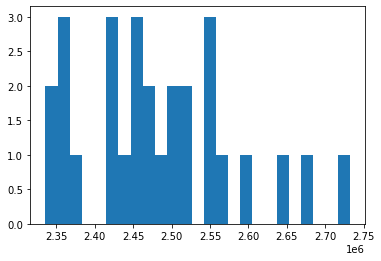

In [42]:
plt.hist(pairwise_diffs['SharedGenomeLen'], bins=25)

**Adding a column that is snps/kb (divide numdiffs/sharedgenomelen then *1000)**

In [43]:
pairwise_diffs['snps/kb'] = pairwise_diffs['NumDiffs']/pairwise_diffs['SharedGenomeLen'] * 1000
pairwise_diffs

,Contig1,Contig2,SharedGenomeLen,NumDiffs,snps/kb
0,LR135331,Efaeciumref2,2466967,3931,1.593455
1,LR135331,Efaeciumref3,2441344,5927,2.427761
2,LR135331,S1,2597116,4903,1.887863
3,LR135331,S2,2552142,5634,2.207557
4,LR135331,S3,2678498,6305,2.353931
5,LR135331,S4,2731998,3100,1.134701
6,LR135331,S5,2544836,7033,2.763636
7,Efaeciumref2,Efaeciumref3,2352507,5029,2.137719
8,Efaeciumref2,S1,2419593,208,0.085965
9,Efaeciumref2,S2,2353174,4025,1.710456


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        2., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 3., 3., 1., 3.,
        0., 1., 1., 0., 1., 1., 2., 0., 2., 1., 0., 0., 0., 0., 0., 1.]),
 array([0.08596487, 0.13951829, 0.19307171, 0.24662513, 0.30017855,
        0.35373197, 0.40728539, 0.46083881, 0.51439223, 0.56794565,
        0.62149907, 0.67505249, 0.72860591, 0.78215933, 0.83571274,
        0.88926616, 0.94281958, 0.996373  , 1.04992642, 1.10347984,
        1.15703326, 1.21058668, 1.2641401 , 1.31769352, 1.37124694,
        1.42480036, 1.47835378, 1.5319072 , 1.58546062, 1.63901404,
        1.69256746, 1.74612088, 1.7996743 , 1.85322772, 1.90678114,
        1.96033456, 2.01388798, 2.06744139, 2.12099481, 2.17454823,
        2.22810165, 2.28165507, 2.33520849, 2.38876191, 2.44231533,
        2.49586875, 2.54942217, 2.60297559, 2.65652901, 2.71008243,
        2.76363585]),
 <BarContainer object of 50 artists>)

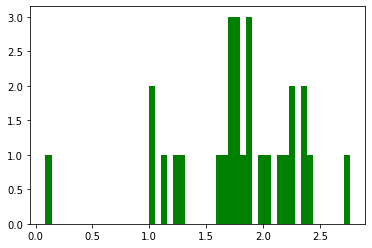

In [44]:
plt.hist(pairwise_diffs['snps/kb'],  bins=50, color='g')

In [56]:
 pivoted_snps = pairwise_diffs.pivot(index="Contig1", columns="Contig2", values="snps/kb")
pivoted_snps

Contig2,Efaeciumref2,Efaeciumref3,S1,S2,S3,S4,S5
Contig1,,,,,,,
Efaeciumref2,NaN,2.137719,0.085965,1.710456,1.267729,1.005016,1.751137
Efaeciumref3,NaN,NaN,2.250732,1.905746,1.735535,2.244068,2.059761
LR135331,1.593455,2.427761,1.887863,2.207557,2.353931,1.134701,2.763636
S1,NaN,NaN,NaN,1.731226,1.214103,1.028320,1.775687
S2,NaN,NaN,NaN,NaN,1.898081,1.752278,2.368432
S3,NaN,NaN,NaN,NaN,NaN,1.648676,1.975512
S4,NaN,NaN,NaN,NaN,NaN,NaN,1.810397


### Plotting heatmap of the snp differences between samples ###

<AxesSubplot:xlabel='Contig2', ylabel='Contig1'>

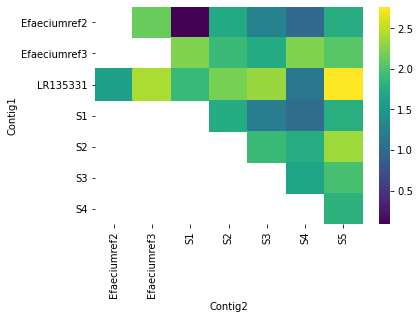

In [57]:
sns.heatmap(pivoted_snps, cmap='viridis')

<AxesSubplot:xlabel='Contig2', ylabel='Contig1'>

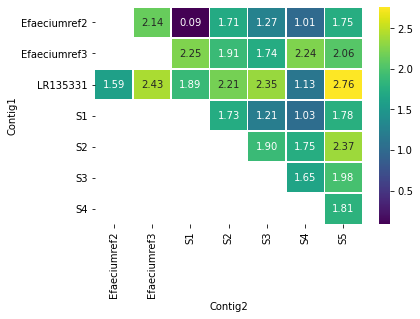

In [59]:
sns.heatmap(pivoted_snps, fmt=".2f", cmap='viridis', annot=True, linewidths=0.5)

In [62]:
plt.savefig('snps_per_kb_vre_samples.png')

<Figure size 432x288 with 0 Axes>